<h2> Import and Data Loading </h2>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data_ecommerce_customer_churn.csv')

#Data Cleaning: Handling Missing Values (Corrected Method) 
print("Data loaded. Starting data cleaning...")
for col in ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']:
    if df[col].isnull().any():
        # Calculate the mean for the column
        mean_value = df[col].mean()
        
        df[col] = df[col].fillna(mean_value)
        
        print(f"Cleaned missing values in '{col}'.")

print("\nData cleaning complete.")
df.head()

Data loaded. Starting data cleaning...
Cleaned missing values in 'Tenure'.
Cleaned missing values in 'WarehouseToHome'.
Cleaned missing values in 'DaySinceLastOrder'.

Data cleaning complete.


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.000000,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.000000,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.000000,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.531652,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.000000,322.17,0


<h2> Feature X & y </h2>

In [2]:
# Define the features (independent variables) and the target (dependent variable)
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (3941, 10)
Target (y) shape: (3941,)


<h2> Preprocessing </h2>

In [12]:
# Identify categorical and numerical feature names
categorical_features = ['PreferedOrderCat', 'MaritalStatus']
numerical_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                      'SatisfactionScore', 'NumberOfAddress', 'Complain',
                      'DaySinceLastOrder', 'CashbackAmount']


preprocessor = ColumnTransformer(
    transformers=[

        ('num', StandardScaler(), numerical_features),

        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessor configured successfully.")


Preprocessor configured successfully.


<h2> Train & Test Split </h2>

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Data split into training and testing sets:
X_train shape: (3152, 10)
X_test shape: (789, 10)


<h2> Model Training </h2>

In [5]:
# Create a Pipeline to chain the preprocessing steps and the model together
# This is best practice as it prevents data leakage from the test set
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced')) # class_weight='balanced' helps with imbalanced data
])

# Train the entire pipeline on the training data
model_pipeline.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


<h2> Model Prediction </h2>

In [6]:
# Use the trained pipeline to make predictions on the unseen test data
y_pred = model_pipeline.predict(X_test)

print("Predictions generated for the test set.")


Predictions generated for the test set.


<h2> Evaluation Confusion Matrix </h2>

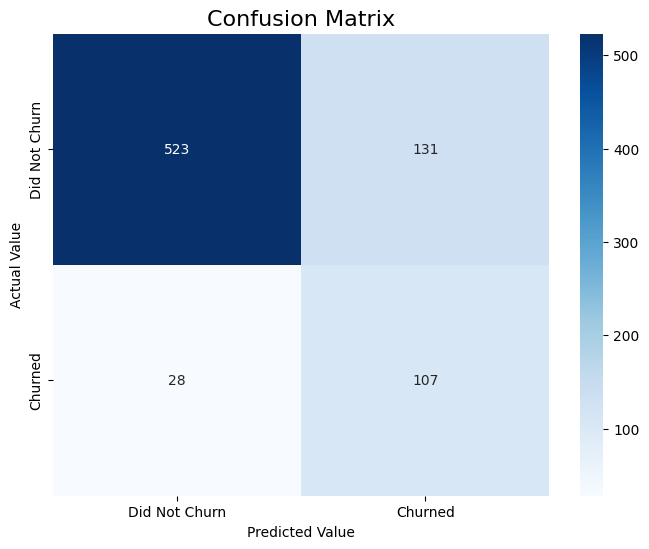

In [9]:
# --- Evaluation Part 1: Confusion Matrix ---

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Churn', 'Churned'], 
            yticklabels=['Did Not Churn', 'Churned'])
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix', fontsize=16)
plt.show()


<h2> Classification Report </h2>

In [10]:
# --- Evaluation Part 2: Classification Report ---

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Did Not Churn', 'Churned'])
print("--- Classification Report ---")
print(report)


--- Classification Report ---
               precision    recall  f1-score   support

Did Not Churn       0.95      0.80      0.87       654
      Churned       0.45      0.79      0.57       135

     accuracy                           0.80       789
    macro avg       0.70      0.80      0.72       789
 weighted avg       0.86      0.80      0.82       789

